In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv')

## Data Exploration and Manuplation##

In [4]:
df.head()

,Temperature,Salinity,DO%,PH,Turbidity
0,13.16,33.06,82.90,7.88,3.3
1,13.18,33.13,83.50,7.89,4.4
2,13.13,33.25,84.20,7.90,4.6
3,13.10,33.34,84.81,7.91,5.8
4,13.05,33.45,85.60,7.92,3.5


In [47]:
df.describe(include='all')

,Temperature,Salinity,DO%,PH,Turbidity
count,39988.000000,39988.000000,39988.000000,39988.000000,39988.000000
mean,23.628710,23.665266,102.596056,7.932014,4.371219
std,3.799761,3.549520,26.736588,0.203872,5.388780
min,5.170000,12.370000,17.620000,7.310000,0.100000
25%,21.840000,21.220000,87.900000,7.800000,2.400000
50%,24.420000,22.640000,98.200000,7.930000,3.170000
75%,26.320000,27.030000,112.400000,8.060000,4.250000
max,30.980000,34.030000,308.200000,8.830000,149.200000


In [46]:
df.isnull().sum()

Temperature    0
Salinity       0
DO%            0
PH             0
Turbidity      0
dtype: int64

In [8]:
df.dtypes

Temperature    float64
Salinity       float64
DO%            float64
PH             float64
Turbidity      float64
dtype: object

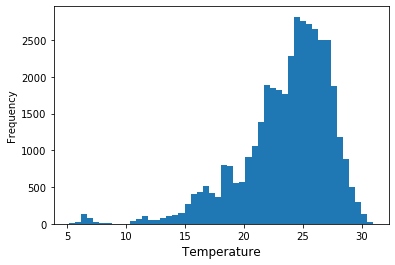

In [45]:
df['Temperature'].plot.hist(bins=50)
plt.xlabel('Temperature', fontsize=12)
df.dropna(inplace=True)

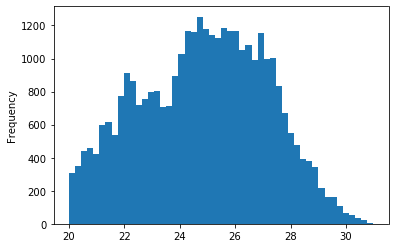

In [12]:
(df['Temperature'].loc[df['Temperature']>20]).plot.hist(bins=50)

Text(0.5, 0, 'PH')

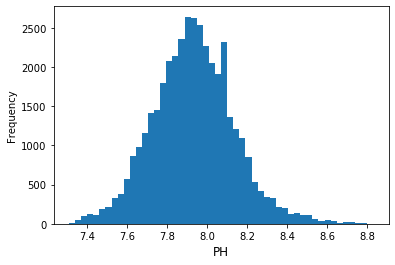

In [19]:
df['PH'].plot.hist(bins=50)
plt.xlabel('PH', fontsize=12)

Text(0.5, 0, 'sainity')

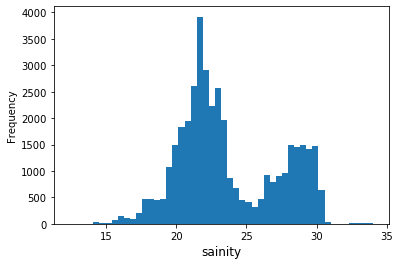

In [20]:
df['Salinity'].plot.hist(bins=50)
plt.xlabel('sainity',fontsize=12)

Text(0.5, 0, 'turbidity')

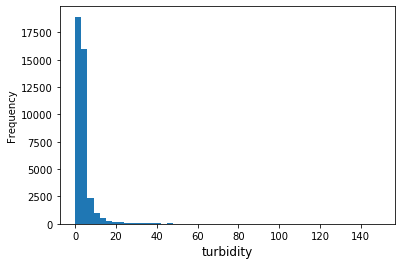

In [21]:
df['Turbidity'].plot.hist(bins=50)
plt.xlabel('turbidity',fontsize=12)

Text(0.5, 0, 'DO%')

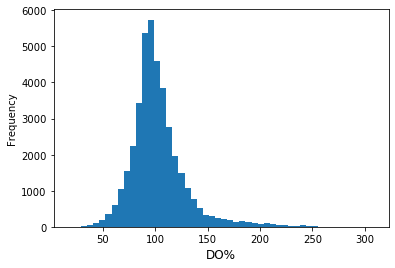

In [32]:
df['DO%'].plot.hist(bins=50)
plt.xlabel('DO%',fontsize=12)

# Bivariate Analysis#

In [37]:
x = 'DO%'
lst = list(df.columns)
lst.remove(x)
lst

['Temperature', 'Salinity', 'PH', 'Turbidity']

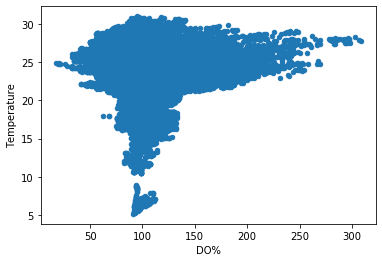

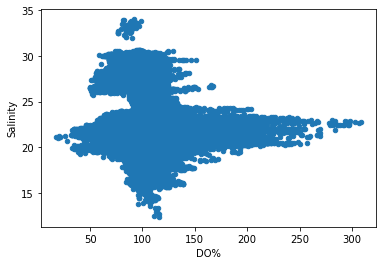

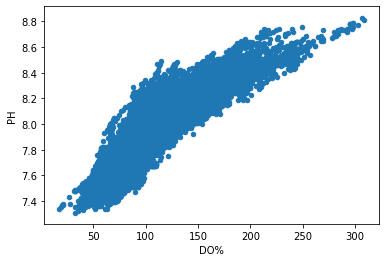

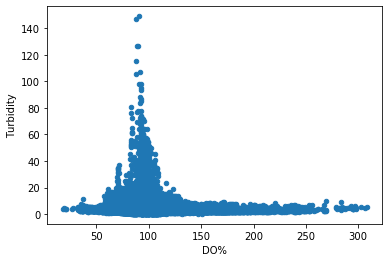

In [38]:
for i in lst:
    df.plot.scatter(x,i)

Clearly only ph and do have linear relationship.

## Model Building ##

Find correlation

In [39]:
df[['PH','DO%']].corr()

,PH,DO%
PH,1.000000,0.843284
DO%,0.843284,1.000000


In [48]:
df.corr()

,Temperature,Salinity,DO%,PH,Turbidity
Temperature,1.000000,0.016011,0.048661,-0.113474,-0.107204
Salinity,0.016011,1.000000,-0.210966,-0.026001,0.265304
DO%,0.048661,-0.210966,1.000000,0.843306,-0.106736
PH,-0.113474,-0.026001,0.843306,1.000000,-0.030767
Turbidity,-0.107204,0.265304,-0.106736,-0.030767,1.000000


In [137]:
y = np.array(df['DO%'])
x = np.array(df[['PH','Salinity']])
#x = x.reshape(-1, 1)

In [138]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((27991, 2), (11997, 2), (27991,), (11997,))

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [140]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
pred_train = lreg.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [142]:
pred_test = lreg.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [143]:
print('Training score:', train_score)
print('Validation score:', valid_score)

Training score: 0.11938411654305327
Validation score: 0.12046520406643622


In [144]:
from sklearn.metrics import r2_score

In [145]:
r2_score(valid_y,pred_test)

0.7411924084367745